# Exploration

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

In [2]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

#my wrangle file
import wrangle

## Acquire and Prepare Data

We're going to acquire the student grade data like we saw in the prior lesson.

In [4]:
# Use our wrangle function to acquire and prepare our data.
df = wrangle.wrangle_grades()

In [5]:
#look at your data!
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [7]:
df.shape

(102, 5)

In [9]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [10]:
# verify student_id is unique
df.student_id.nunique()

102

In [15]:
df.final_grade.value_counts()

96    8
95    8
87    8
85    8
97    8
81    8
93    8
76    8
77    8
68    8
72    8
70    7
65    7
Name: final_grade, dtype: int64

#### target variable?
- final grade!
- continious aka regression problem

#### other variables of value?
- exam1, exam2, exam3
- all continious

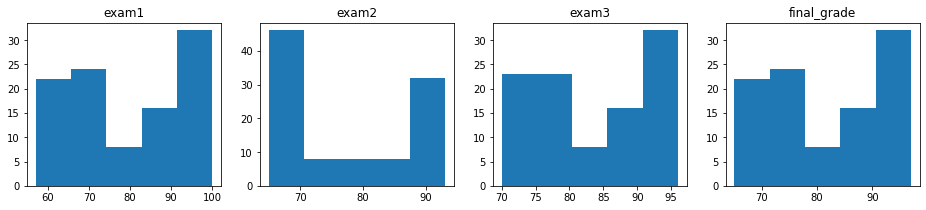

In [14]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

### What must we do before exploring relationships? 

In [57]:
#train, validate, test split
train, validate, test = wrangle.split_continuous(df)

train -> (56, 5)
validate -> (25, 5)
test -> (21, 5)


## Explore

### Why Explore?
 - What is the purpose of this pipeline stage?

### Main Stages in Exploration
- Hypothesize
- Visualize
    - Plot out the distributions of each feature 
     - Why?
    - Plot out the interaction of two or more variables?
     - Why?
    - Plot out how subgroups compare to each-other and to the overall population?
     - Why?
    - Document takeaways
     - Why?
    - Identify features that correlate with each other
     - Why?

- Test Hypotheses

### Types of Visualizations

- **Univariate Distributions**
    
    - Continuous variable distributions
        - histogram
        - boxplot
        - displot
    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships** 

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot
    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot
        
    - Discrete with Discrete
        - heatmap

___

## Explore our exam dataset
### Goal

> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

## Q1. Is there a relationship between exam1 and final grade? 

- both of my variables are continious
- check for correlation

### Hypothesis

- ${H_0}$: there is no there linear correlation between exam1 and final_grade
- ${H_a}$:  there is a linear correlation between exam1 and final_grade

### Visualize

### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset.

1. Determine if normally distributed
    - if normal, use pearsons method
    - if not, use spearman
2. Calculate the correlation coefficient for each pair of variables
    - use pandas `.corr()` 
    - it defaults to `method=pearson`
    - can change to `method=spearman`
3. Use correleation coefficients to generate heatmap 


In [58]:
# create the correlation matrix using pandas .corr()
exam_corr = train.drop(columns='student_id').corr(method='spearman')
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.940463,0.918660,0.987083
exam2,0.940463,1.000000,0.929203,0.910915
exam3,0.918660,0.929203,1.000000,0.930853
final_grade,0.987083,0.910915,0.930853,1.000000


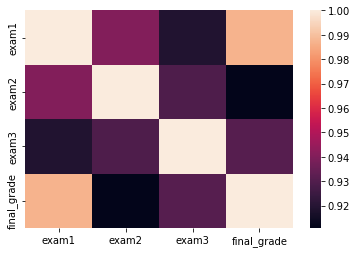

In [59]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(exam_corr)
plt.show()

In [60]:
np.triu(exam_corr)

array([[1.        , 0.9404633 , 0.91866039, 0.98708303],
       [0.        , 1.        , 0.92920348, 0.91091511],
       [0.        , 0.        , 1.        , 0.93085261],
       [0.        , 0.        , 0.        , 1.        ]])

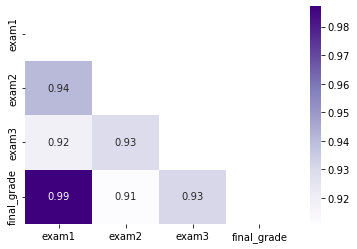

In [61]:
# pass my correlation matrix to Seaborn's heatmap with customization
sns.heatmap(exam_corr, cmap='Purples', annot=True, 
            mask=np.triu(exam_corr))
plt.show()

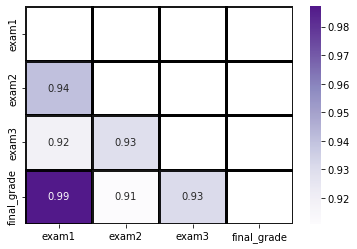

In [62]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(exam_corr, cmap='Purples', annot=True, 
            mask=np.triu(exam_corr), **kwargs)
plt.show()

### Test Hypothesis

In [63]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p_value = spearmanr(train.exam1, train.final_grade)

In [64]:
print(f'Correlation Coefficient by Spearman Test: {r}\np-value: {p_value}')

Correlation Coefficient by Spearman Test: 0.9870830318356753
p-value: 1.2369246014330318e-44


In [65]:
# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

We can reject the null hypothesis


#### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` are almost perfectly correlated. This looks to be the best predictor of our target variable.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `exam1` and `final_grade`.**
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
- When building my model, I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.

### What other visualizations could we have used?

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

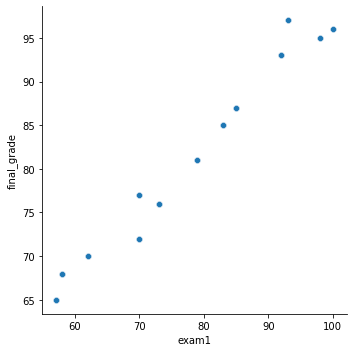

In [66]:
sns.relplot(data=train, x='exam1', y='final_grade')
plt.show()

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

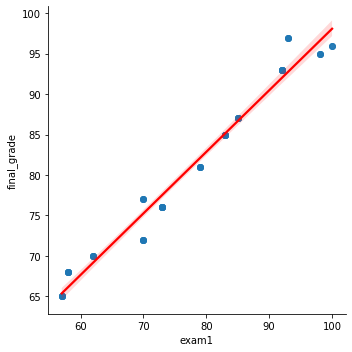

In [67]:
# I can really pop that line color if I want
sns.lmplot(data=train, x='exam1', y='final_grade',
           line_kws={'color':'red'})
plt.show()

### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

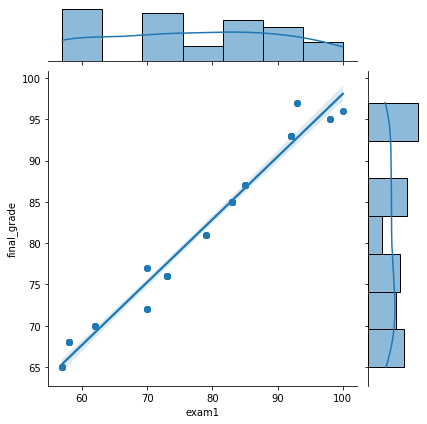

In [68]:
sns.jointplot(data=train, x='exam1', y='final_grade',
             kind='reg')
plt.show()

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

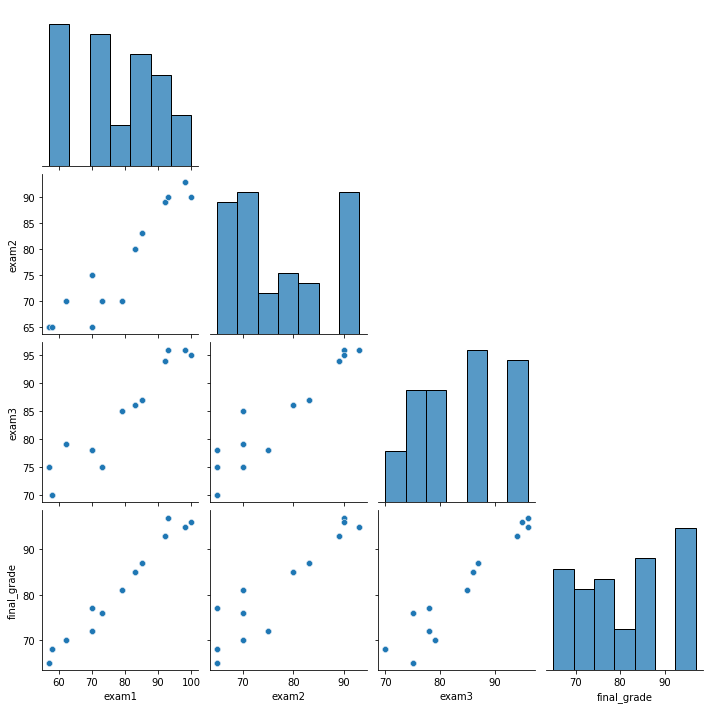

In [69]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(data=train.drop(columns='student_id'),
            corner=True)
plt.show()

Takeways
- My `relplot`, `lmplot`, and `jointplots` charts show me that there is a linear relationship between `exam1` and `final_grade`.
- My `pairplot` shows me that there are linear relationships between the other exams scores, as well 

___

## Q2: Is there a cutoff in grade that makes sense to investigate? Passing/failing/letter grades?

In [70]:
#number of people who failed each test
for col in train.columns[1:]:
    print(f'On {col}, {(train[col] < 70).sum()} students failed.')

On exam1, 14 students failed.
On exam2, 13 students failed.
On exam3, 0 students failed.
On final_grade, 10 students failed.


### Make categorical values for further exploration

In [71]:
#assign fail and pass for each test
for col in train.columns[1:]:
    train[col + '_pass'] = np.where( (train[col] < 70), 'fail', 'pass')

In [72]:
train.head()

,student_id,exam1,exam2,exam3,final_grade,exam1_pass,exam2_pass,exam3_pass,final_grade_pass
51,52,70,75,78,72,pass,pass,pass,pass
24,25,57,65,75,65,fail,fail,pass,fail
57,58,79,70,85,81,pass,pass,pass,pass
92,93,98,93,96,95,pass,pass,pass,pass
81,82,83,80,86,85,pass,pass,pass,pass


### Whats the relationship between passing exam1 and the final_exam grade?

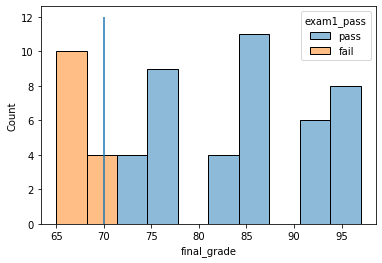

In [78]:
#seaborn histplot 
sns.histplot(data=train, x='final_grade', 
             hue='exam1_pass', bins=10)

#set line for passing level
plt.vlines(70, 0, 12)
plt.show()

In [80]:
#mean final_grade by exam1 pass/fail status
train.groupby('exam1_pass').final_grade.mean()

exam1_pass
fail    67.5
pass    85.0
Name: final_grade, dtype: float64

### What percentage of students failed exam1 and the final?

In [84]:
((train.exam1_pass == 'fail') & (train.final_grade_pass == 'fail')).mean()

0.17857142857142858

### Of the students who failed exam1, how many also failed the final?

In [88]:
#create subset of people who failed exam1
subset = train [train.exam1_pass == 'fail']
subset

,student_id,exam1,exam2,exam3,final_grade,exam1_pass,exam2_pass,exam3_pass,final_grade_pass
24,25,57,65,75,65,fail,fail,pass,fail
101,102,58,65,70,68,fail,fail,pass,fail
10,11,58,65,70,68,fail,fail,pass,fail
75,76,58,65,70,68,fail,fail,pass,fail
87,88,62,70,79,70,fail,pass,pass,pass
61,62,62,70,79,70,fail,pass,pass,pass
36,37,58,65,70,68,fail,fail,pass,fail
35,36,62,70,79,70,fail,pass,pass,pass
89,90,57,65,75,65,fail,fail,pass,fail
63,64,57,65,75,65,fail,fail,pass,fail


In [91]:
#how many failed final
(subset.final_grade_pass =='fail').sum()

10

In [92]:
#percentage who failed final
(subset.final_grade_pass =='fail').mean()

0.7142857142857143

### Of the students who failed exam2, how many also failed the final?

In [93]:
#create subset of people who failed exam2
subset = train [train.exam2_pass == 'fail']
subset

,student_id,exam1,exam2,exam3,final_grade,exam1_pass,exam2_pass,exam3_pass,final_grade_pass
24,25,57,65,75,65,fail,fail,pass,fail
101,102,58,65,70,68,fail,fail,pass,fail
10,11,58,65,70,68,fail,fail,pass,fail
75,76,58,65,70,68,fail,fail,pass,fail
36,37,58,65,70,68,fail,fail,pass,fail
86,87,70,65,78,77,pass,fail,pass,pass
89,90,57,65,75,65,fail,fail,pass,fail
63,64,57,65,75,65,fail,fail,pass,fail
76,77,57,65,75,65,fail,fail,pass,fail
50,51,57,65,75,65,fail,fail,pass,fail


In [94]:
#how many failed final
(subset.final_grade_pass =='fail').sum()

10

In [95]:
#percentage who failed final
(subset.final_grade_pass =='fail').mean()

0.7692307692307693

### Of the students who failed both exam1 and exam2, how many also failed the final?

In [96]:
#create subset of people who failed exam2
subset = train [(train.exam2_pass == 'fail') 
                & (train.exam1_pass == 'fail')]
subset

,student_id,exam1,exam2,exam3,final_grade,exam1_pass,exam2_pass,exam3_pass,final_grade_pass
24,25,57,65,75,65,fail,fail,pass,fail
101,102,58,65,70,68,fail,fail,pass,fail
10,11,58,65,70,68,fail,fail,pass,fail
75,76,58,65,70,68,fail,fail,pass,fail
36,37,58,65,70,68,fail,fail,pass,fail
89,90,57,65,75,65,fail,fail,pass,fail
63,64,57,65,75,65,fail,fail,pass,fail
76,77,57,65,75,65,fail,fail,pass,fail
50,51,57,65,75,65,fail,fail,pass,fail
49,50,58,65,70,68,fail,fail,pass,fail


In [97]:
#how many failed final
(subset.final_grade_pass =='fail').sum()

10

In [99]:
#percentage who failed final
(subset.final_grade_pass =='fail').mean()

1.0

#### Takeways
- exam1 and exam2 have a better reflection if someone passes the final exam
- given the multicollinearity present, we may want to just focus on one exam
- if i had time, we could create a new feature that captures if a student failed both exam1 and exam2 